In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime
import importlib
import os

import signals
importlib.reload(signals)

from signals import (
    compute_ttm_sbc_and_repurchase,
    compute_market_cap,
    compute_net_dilution,
    zscore_normalize_net_dilution,
    generate_signals,
)

import backtest
importlib.reload(backtest)

from backtest import (
    calculate_strategy_returns,
    get_sp500_data,
    plot_positions,
    plot_performance_comparison,
)

In [2]:
tickers = [
    "LYFT",
    "UBER",
    "SNOW",
    "CRM",
    "PINS",
    "SNAP",
    "MDB",
    "ROKU",
    "CFLT"
]

## Generate trading signals

In [3]:
def generate_trading_positions(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()

    df = compute_ttm_sbc_and_repurchase(df)
    df = compute_market_cap(df)
    df = compute_net_dilution(df)
    df = zscore_normalize_net_dilution(df)
    df = generate_signals(df)
    df = df.dropna(subset=['closing_price'])

    return df

## Visualize strategy

Processing LYFT backtest...


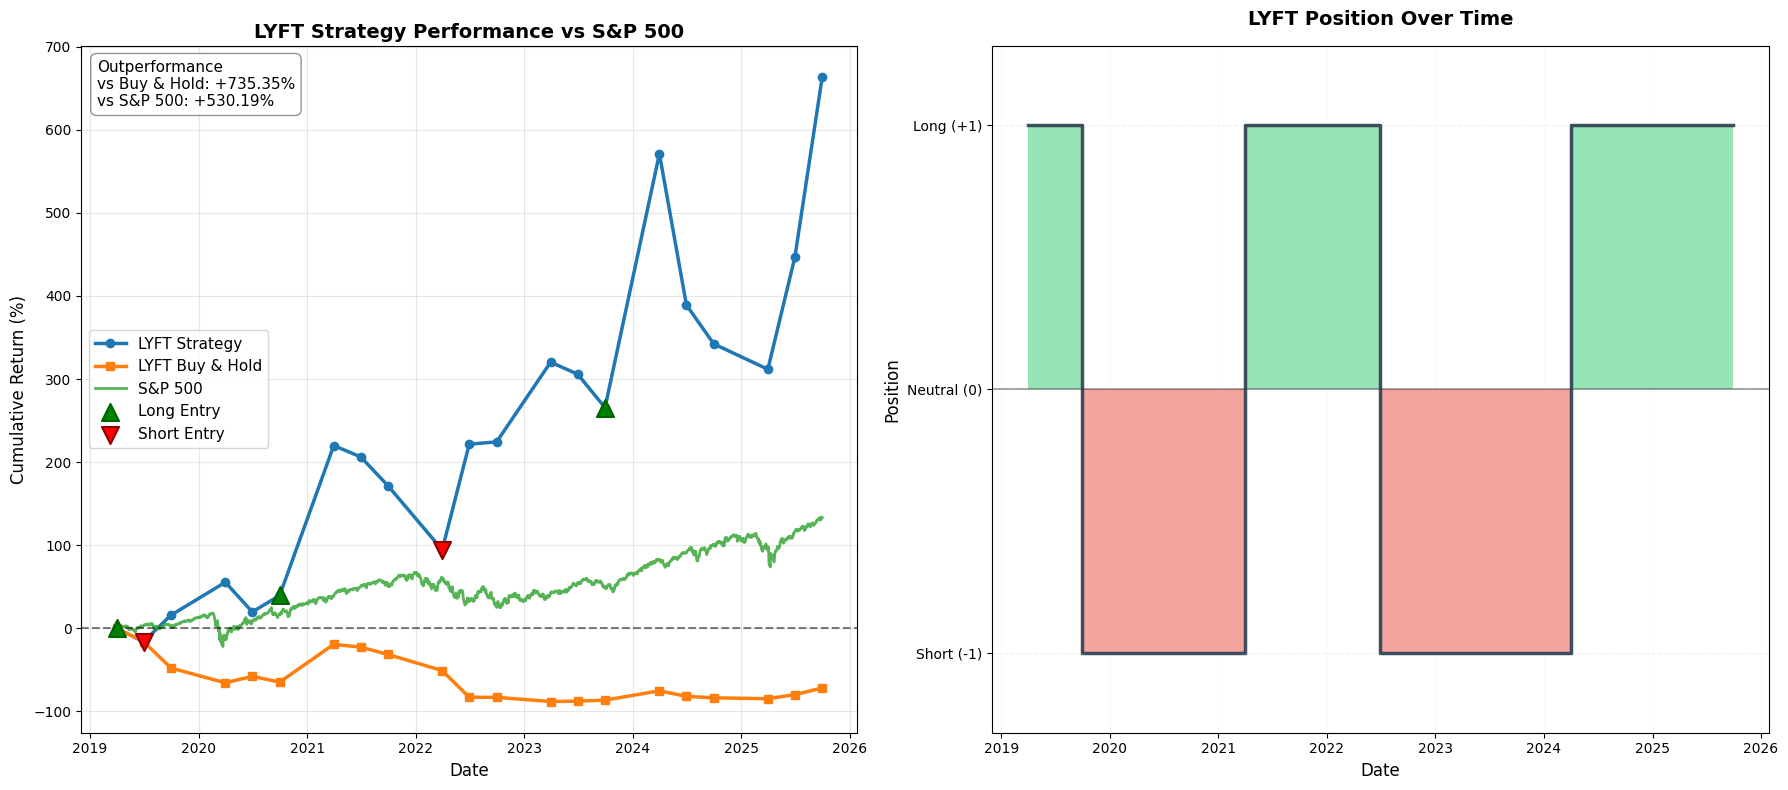

Processing UBER backtest...


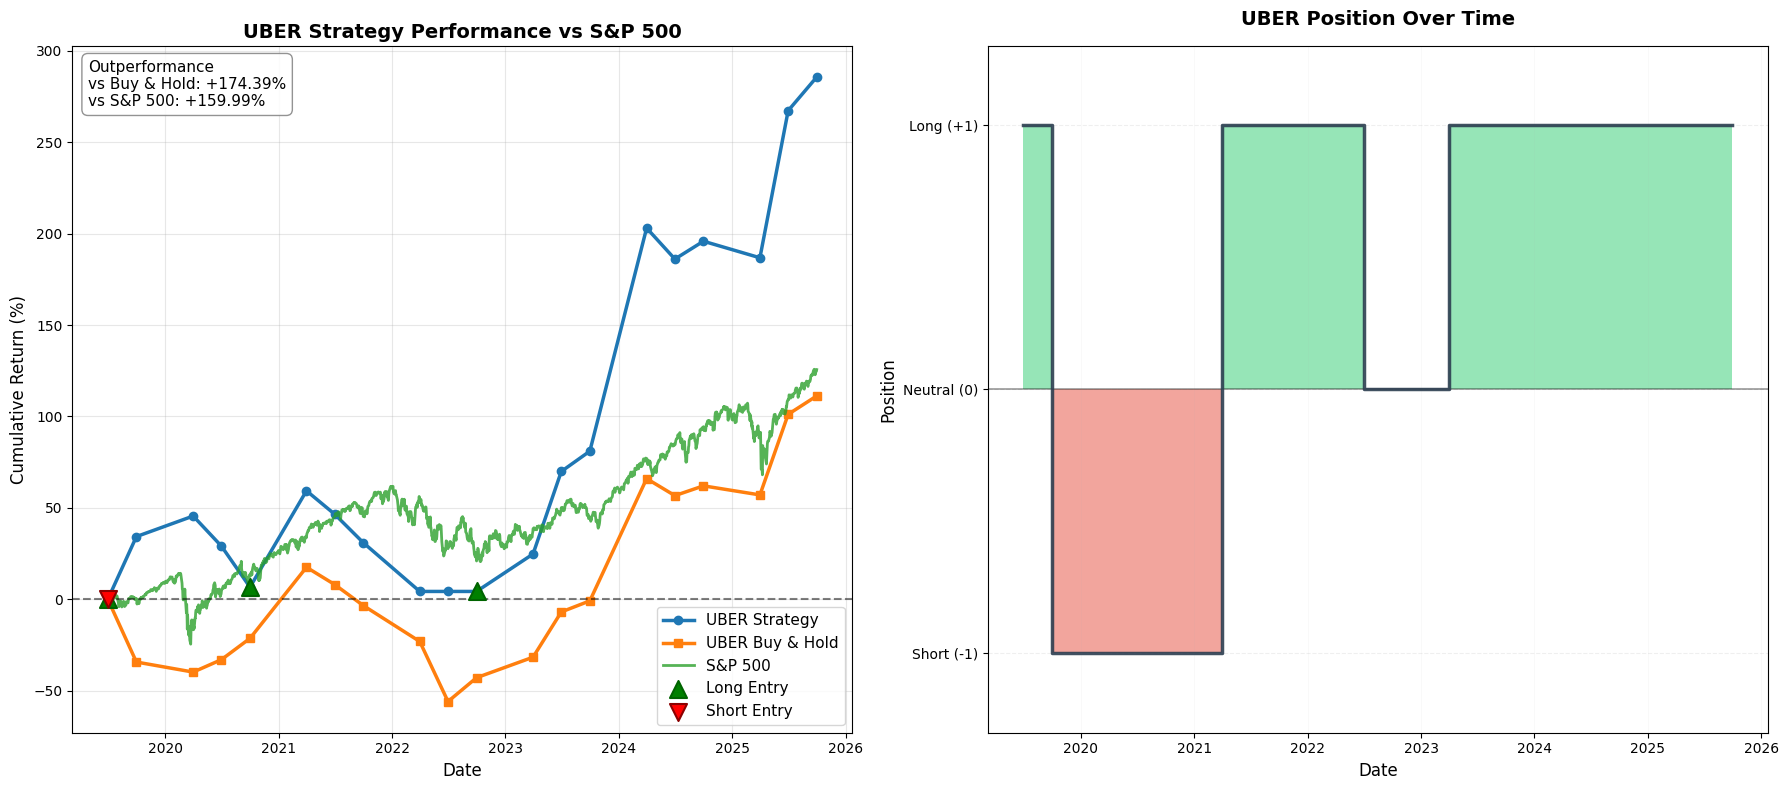

Processing SNOW backtest...


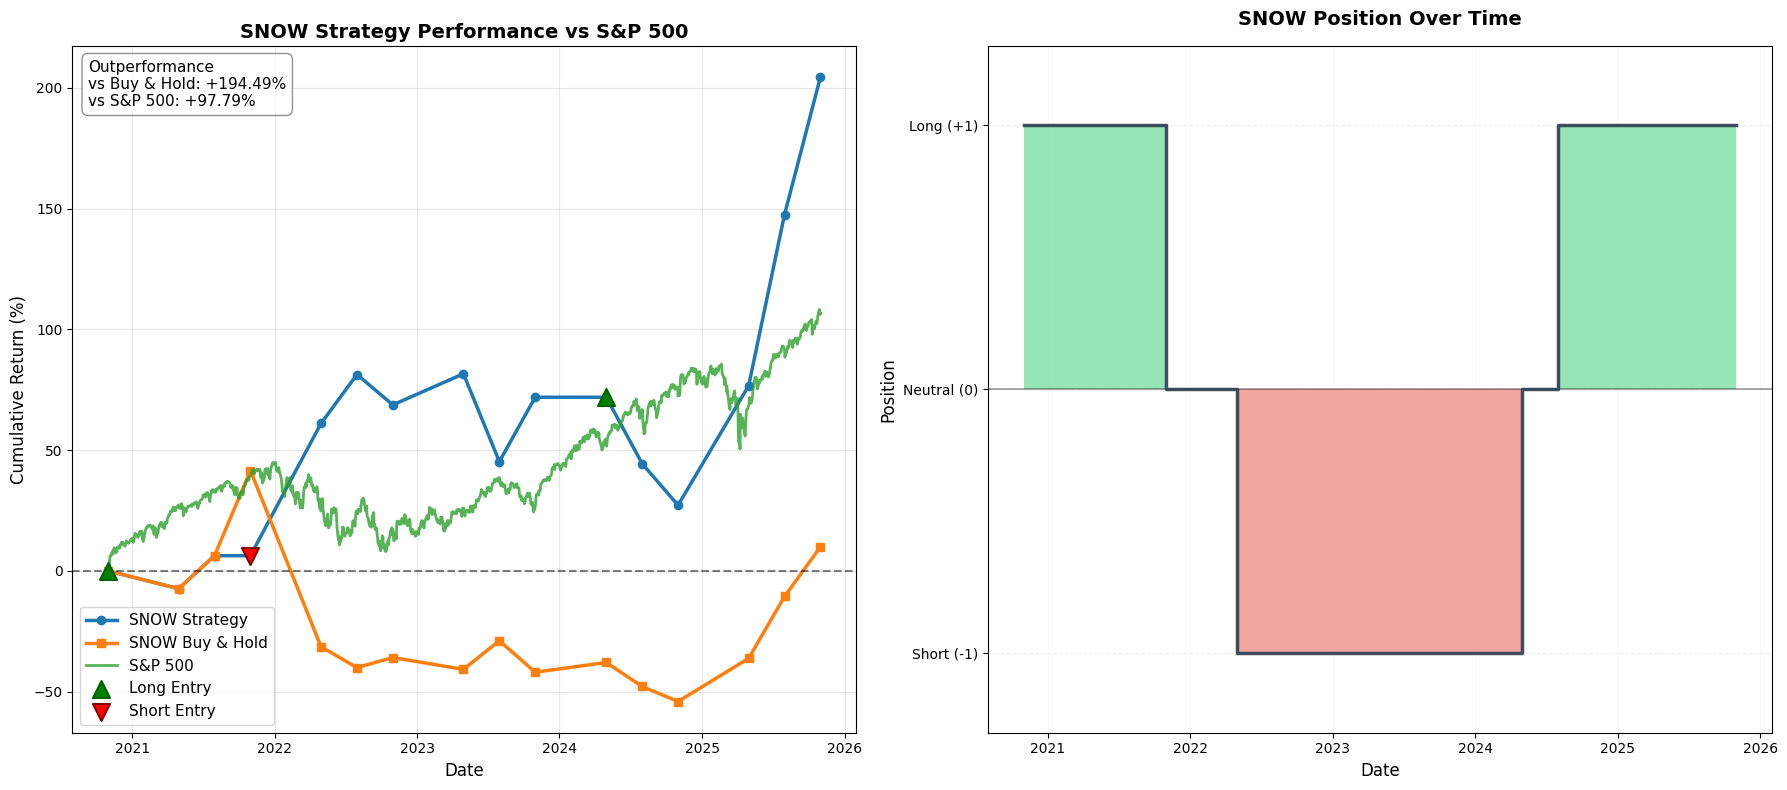

Processing CRM backtest...


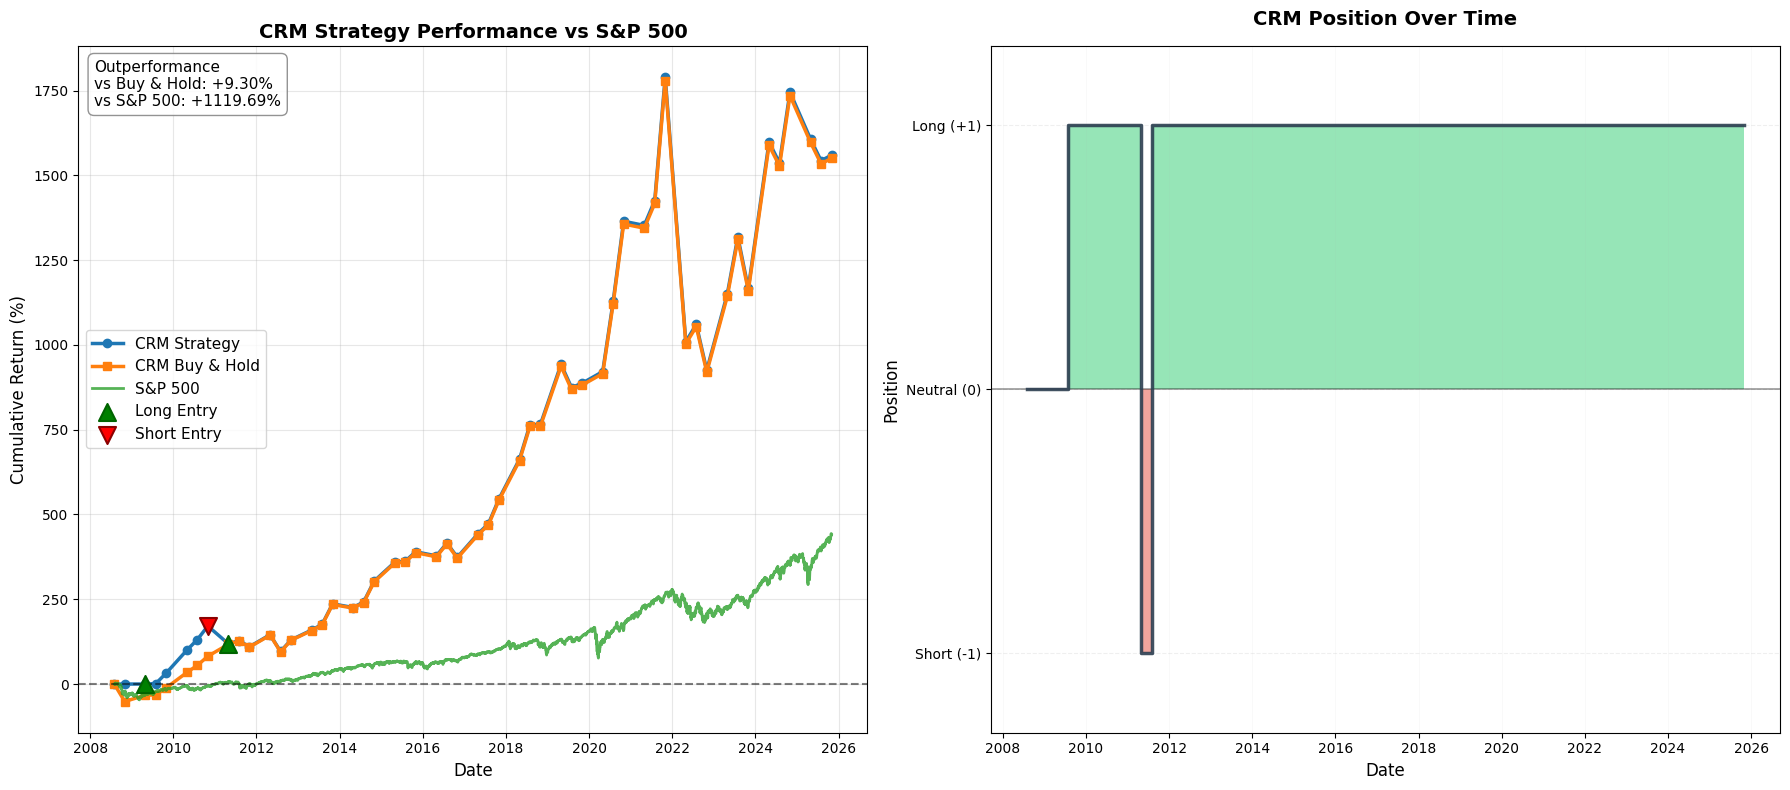

c:\Users\Sihao\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


Processing PINS backtest...


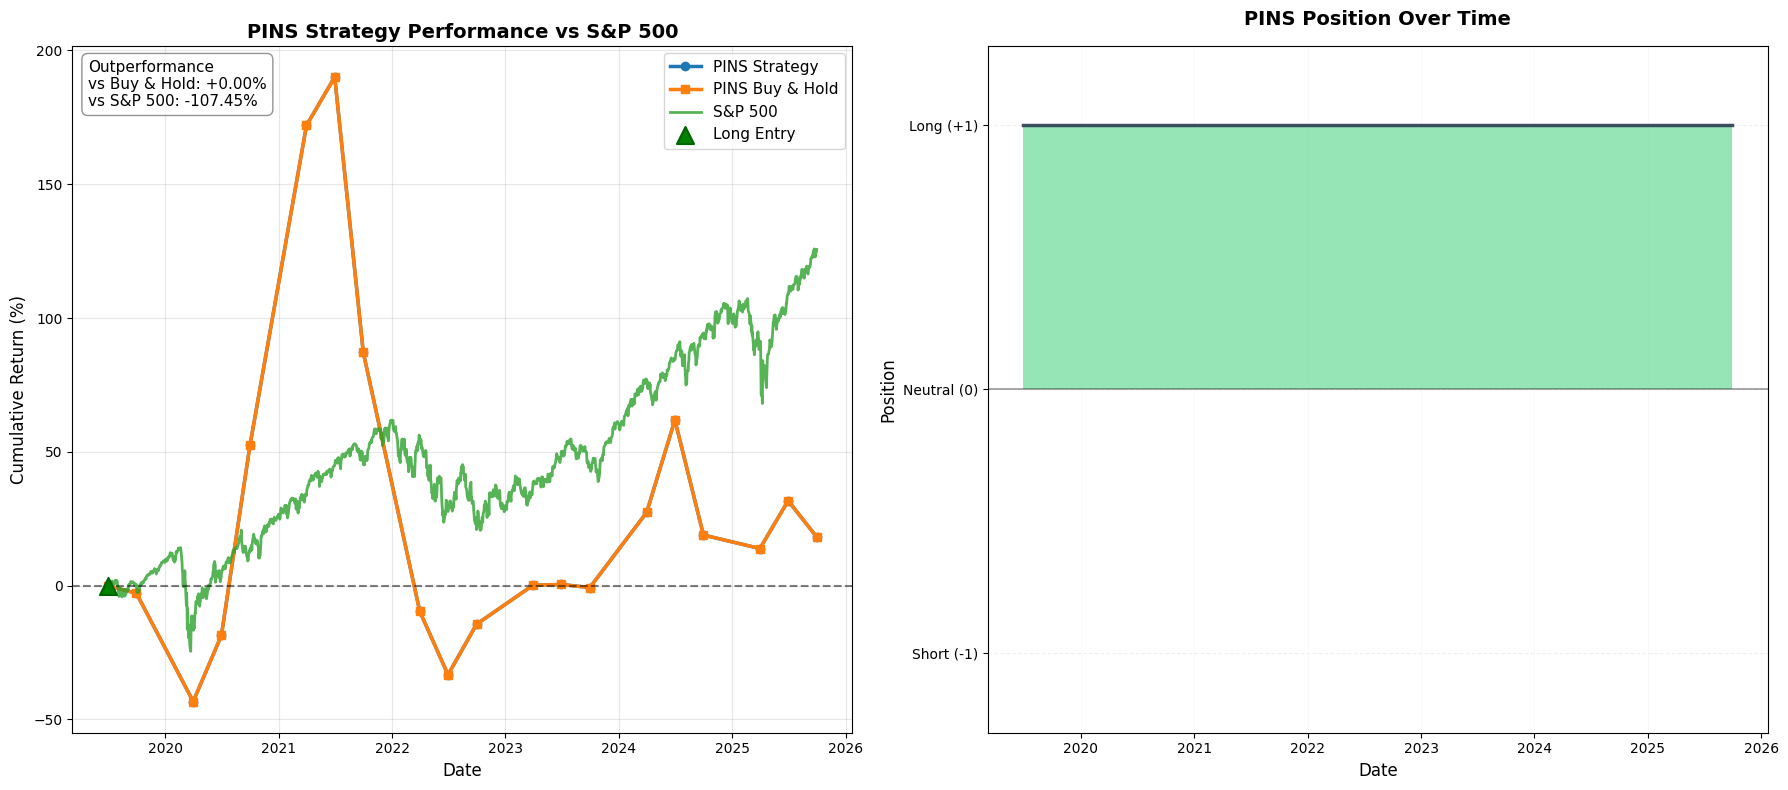

Processing SNAP backtest...


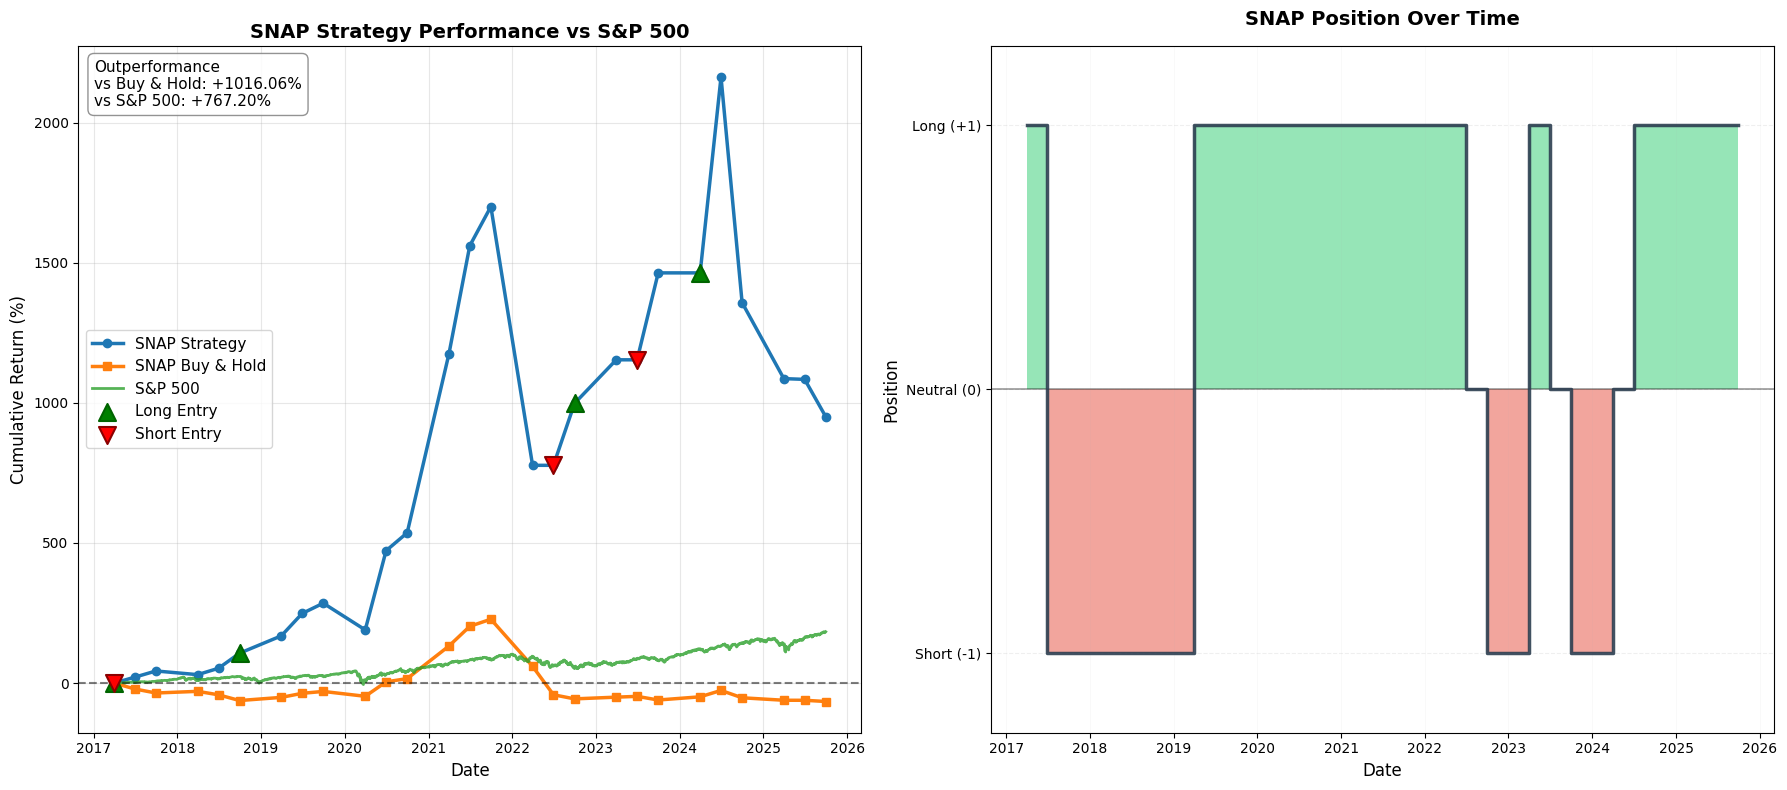

Processing MDB backtest...


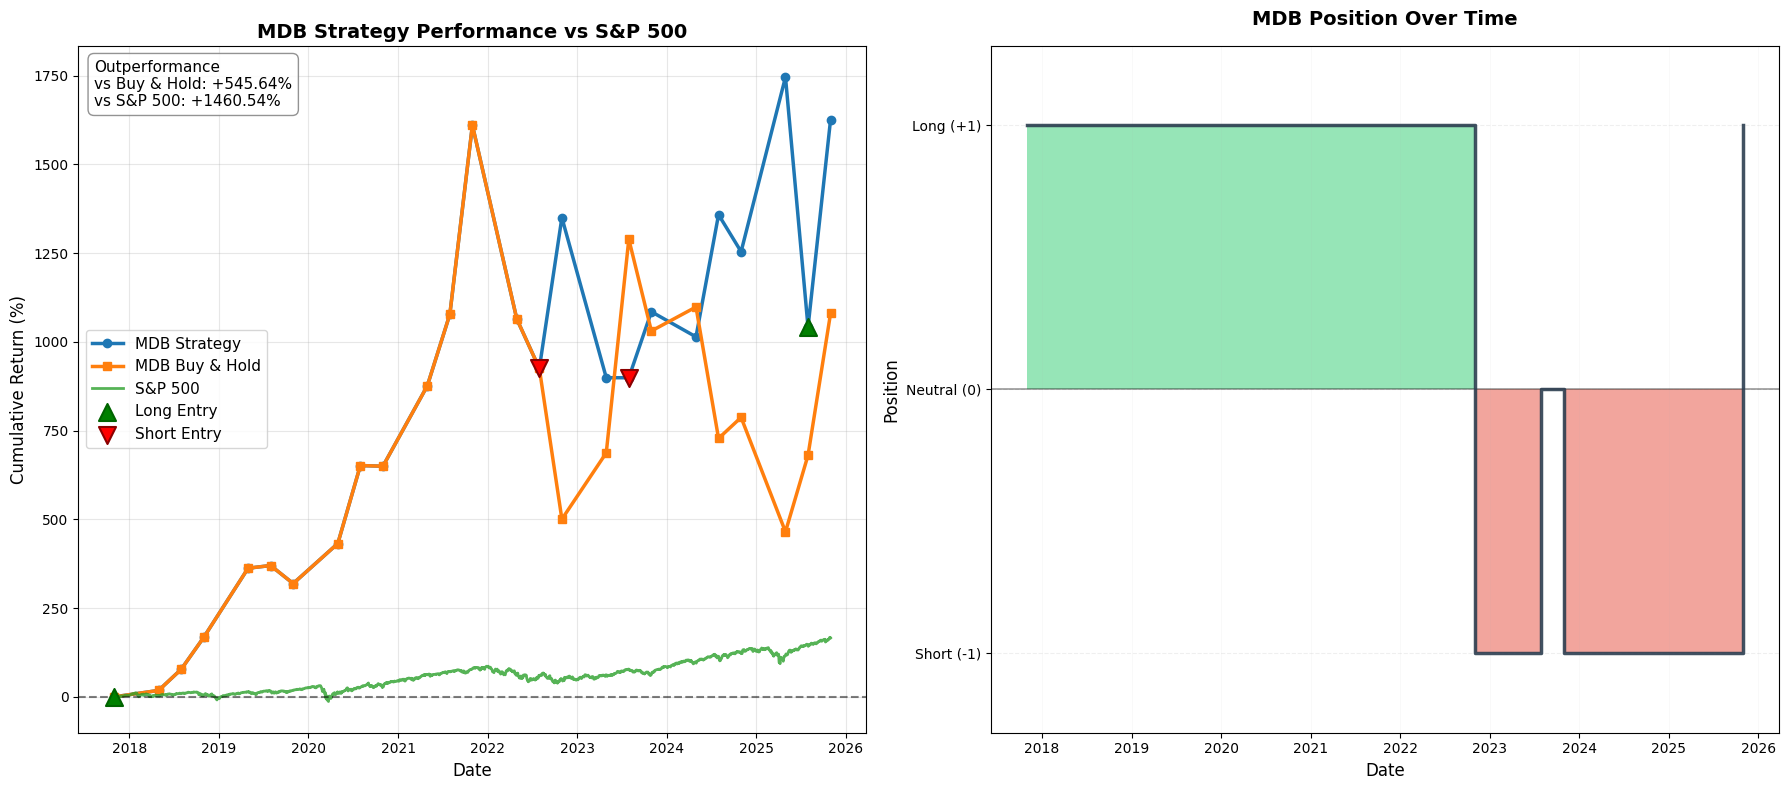

Processing ROKU backtest...


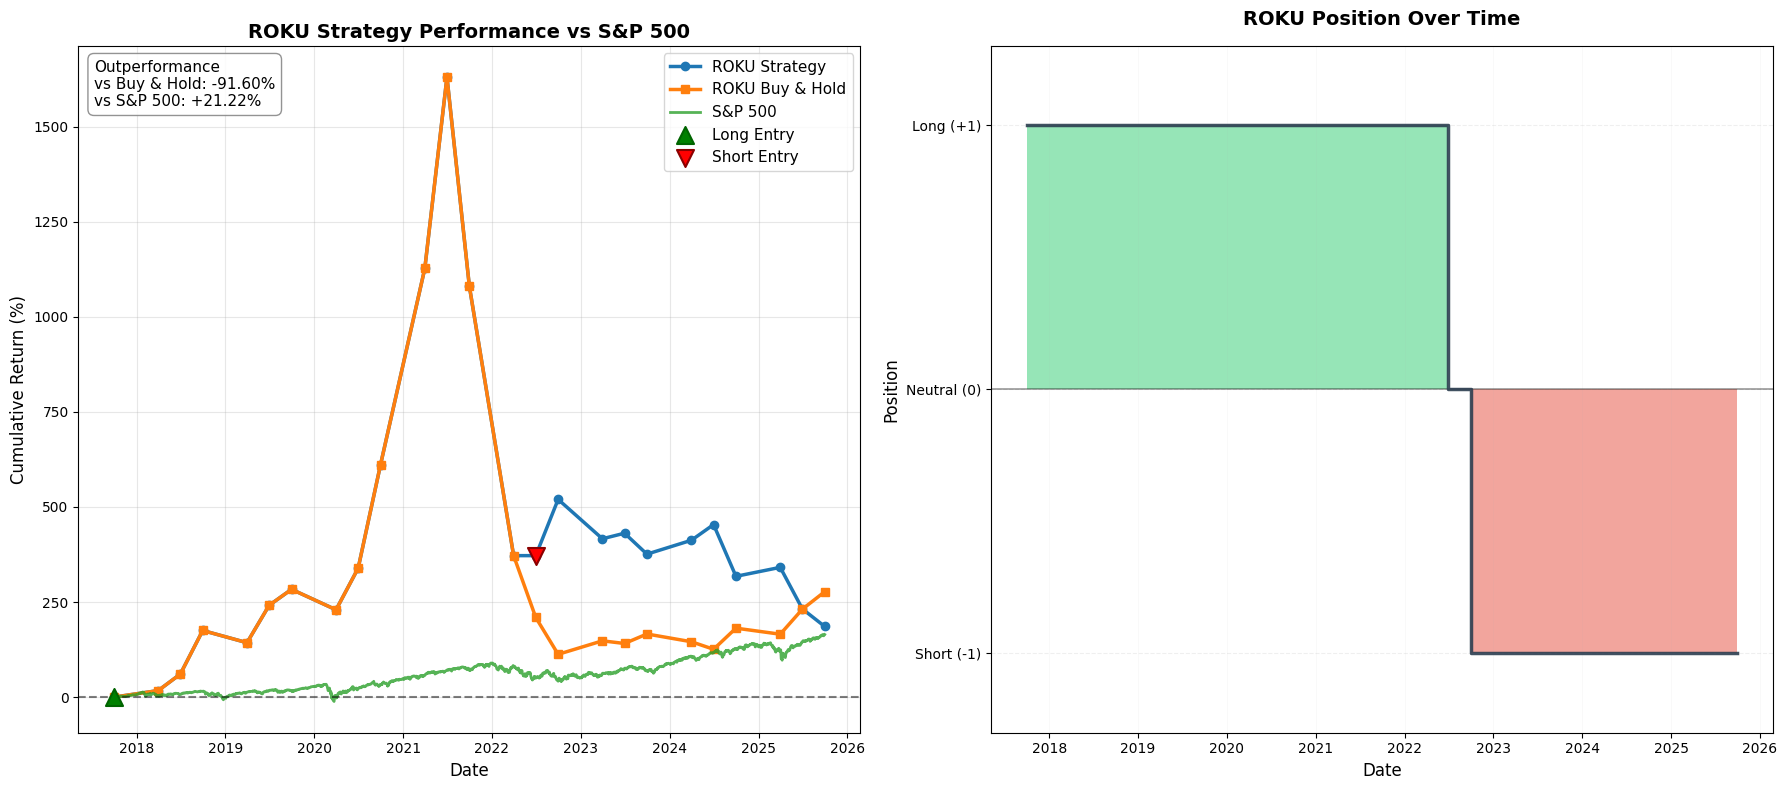

c:\Users\Sihao\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


Processing CFLT backtest...


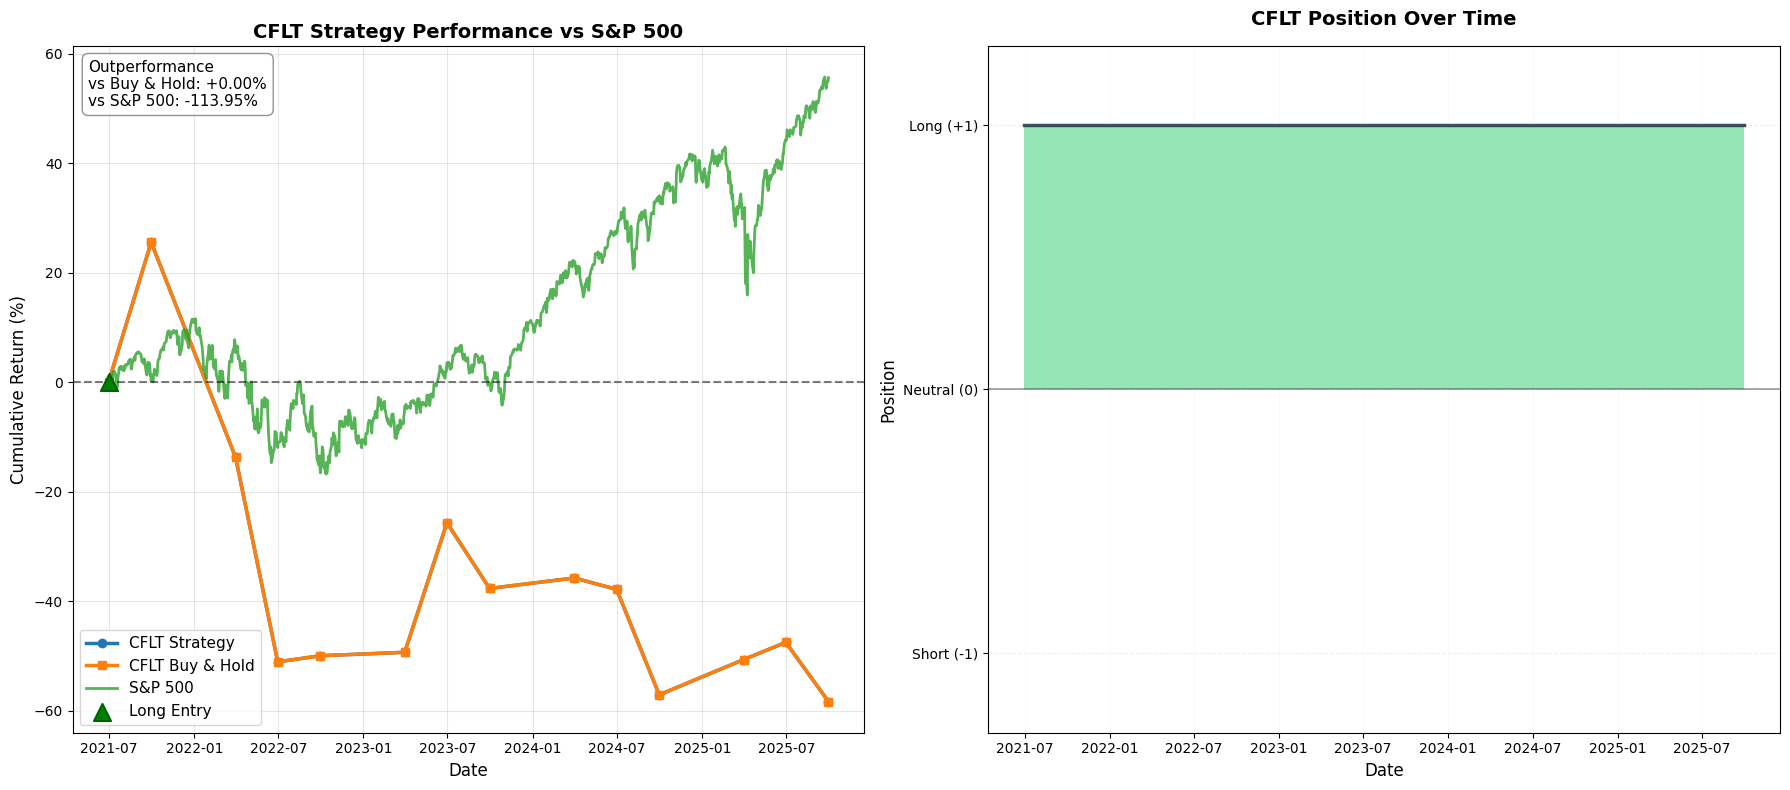

In [4]:
os.makedirs('charts', exist_ok=True)

for ticker in tickers:
    df = pd.read_csv(f"../data/{ticker}.csv")

    df = generate_trading_positions(df)

    print(f"Processing {ticker} backtest...")
    backtest = calculate_strategy_returns(df, f"{ticker}")
    start = backtest['date'].min()
    end = backtest['date'].max()
    sp500 = get_sp500_data(start, end)

    # plot_positions(backtest, f"{ticker}")
    fig = plot_performance_comparison(backtest, sp500, f"{ticker}")
    fig.savefig(f"charts/{ticker}.png", dpi=300, bbox_inches='tight')

In [5]:
# Compare strategy vs buy-and-hold for each ticker
results = []

for ticker in tickers:
    df = pd.read_csv(f"../data/{ticker}.csv")
    df = generate_trading_positions(df)
    bt = calculate_strategy_returns(df, f"{ticker}")

    strategy_final = bt["cumulative_strategy_return"].dropna().iloc[-1]
    market_final = bt["cumulative_market_return"].dropna().iloc[-1]
    diff = strategy_final - market_final

    results.append(
        {
            "ticker": ticker,
            "strategy_final": strategy_final,
            "buy_hold_final": market_final,
            "difference": diff,
        }
    )

results_df = pd.DataFrame(results).set_index("ticker")
results_df["strategy_final_pct"] = results_df["strategy_final"] * 100
results_df["buy_hold_final_pct"] = results_df["buy_hold_final"] * 100
results_df["difference_pct"] = results_df["difference"] * 100

# Output difference per stock and overall average
output_df = results_df[["strategy_final_pct", "buy_hold_final_pct", "difference_pct"]].round(2)
print(output_df)

avg_diff = results_df["difference"].mean()
print(f"Average strategy - buy & hold difference: {avg_diff * 100:.2f}%")



        strategy_final_pct  buy_hold_final_pct  difference_pct
ticker                                                        
LYFT                663.46              -71.89          735.35
UBER                285.62              111.23          174.39
SNOW                204.43                9.94          194.49
CRM                1559.40             1550.10            9.30
PINS                 18.19               18.19            0.00
SNAP                950.28              -65.78         1016.06
MDB                1626.15             1080.51          545.64
ROKU                185.68              277.28          -91.60
CFLT                -58.32              -58.32            0.00
Average strategy - buy & hold difference: 287.07%


c:\Users\Sihao\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Users\Sihao\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
